___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import f1_score
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gozdesim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

sns.set_context(context='talk', font_scale=1, rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Data Wrangling
Take info

In [3]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,1,2,General,Dresses,Dresses


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [4]:
df1 = df.copy()

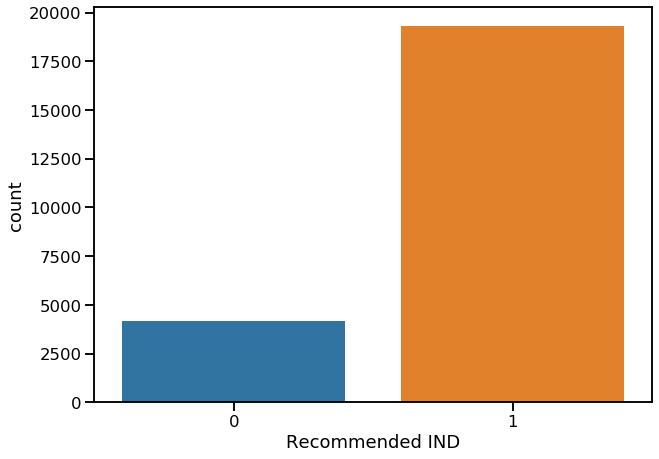

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.27)
sns.countplot(data=df1, x='Recommended IND');

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [7]:
df1.rename(columns={'Recommended IND' : 'Label'}, inplace=True)

In [8]:
df1.rename(columns={'Review Text' : 'Text'}, inplace=True)

### Missing Value Detection

In [10]:
df1.Text.isnull().sum()

845

In [11]:
df1.Label.isnull().sum()

0

In [12]:
df1.dropna(subset=['Text'], inplace=True)

In [13]:
df1['Text'].isnull().sum()

0

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

In [16]:
df2 = df1[['Label', 'Text']]
df2.head()

,Label,Text
0,1,Absolutely wonderful - silky and sexy and comfortable
1,1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,1,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,1,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


In [17]:
from nltk.tokenize import sent_tokenize, wordpunct_tokenize, word_tokenize

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/gozdesim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import contractions

In [22]:
df2['Text'].replace("''", "").str.lower().apply(word_tokenize)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [absolutely, wonderful, -, silky, and, sexy, and, comfortable]
1                                                                                                                                                                                              [love, this, dress, !, it, 's, sooo, pretty, ., i, happened, to, find, it, in, a, store, ,, and, i, 'm, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, it, 's, petite, ., i, bought, a, petite, and, am, 5, ', 8, 

### Noise Removal

In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gozdesim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /Users/gozdesim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gozdesim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gozdesim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
stop_words = stopwords.words('english')
words_to_exclude_from_stopwords = ['not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', 
                                   "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                                   "won't", 'wouldn', "wouldn't"]

new_stopwords = [w for w in stop_words if w not in words_to_exclude_from_stopwords]

In [25]:
def cleaning(data):
    
    import re
    
    #1. Removing URLs
    data = re.sub(r'http\S+', '', data)
    
    #2. Removing Tags
    data = re.sub(r'#\w+', '', data)
    
    #3. Removing Mentions
    data = re.sub(r'@\w+', '', data)
    
    #4. Contractions Expension & Tokenize
    #text_tokens = word_tokenize(contractions.fix(data.lower()))
    text_tokens = word_tokenize(data.replace("''", '').lower())
    
    #5. Removing mentions
    tokens_without_mention = [w for w in text_tokens if not w.startswith('@')]
    
    #6. Remove Puncs
    tokens_without_punc = [w for w in tokens_without_mention if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in new_stopwords]
    
    #8. Lemma 
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

### Lexicon Normalization

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [27]:
positive_sentence = df2[df2['Label']==1]['Text']
positive_sentence = positive_sentence.apply(cleaning)
positive_sentence

0                                                                                                                                                                                                                                                                    absolutely wonderful silky sexy comfortable
1                                                                                                                              love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
3                                                                                                                                                                                                                       love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                    

In [33]:
negative_sentence = df2[df2['Label']==0]['Text']
negative_sentence = negative_sentence.apply(cleaning)
negative_sentence

2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5                                      love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress
10                                                                                                                   dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
22                                                              

### Collect Words (positive and negative separately)

In [30]:
positive_words = ' '.join(positive_sentence)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [34]:
negative_words = ' '.join(negative_sentence)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

In [37]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#create a mask based on the image we wish to include
#create a wordcloud
wc = WordCloud(background_color='white',
              collocations=False,
              width=600,
              height=300,
               contour_width=3,
               max_font_size=256,
              contour_color='black',
              stopwords=stop_words)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

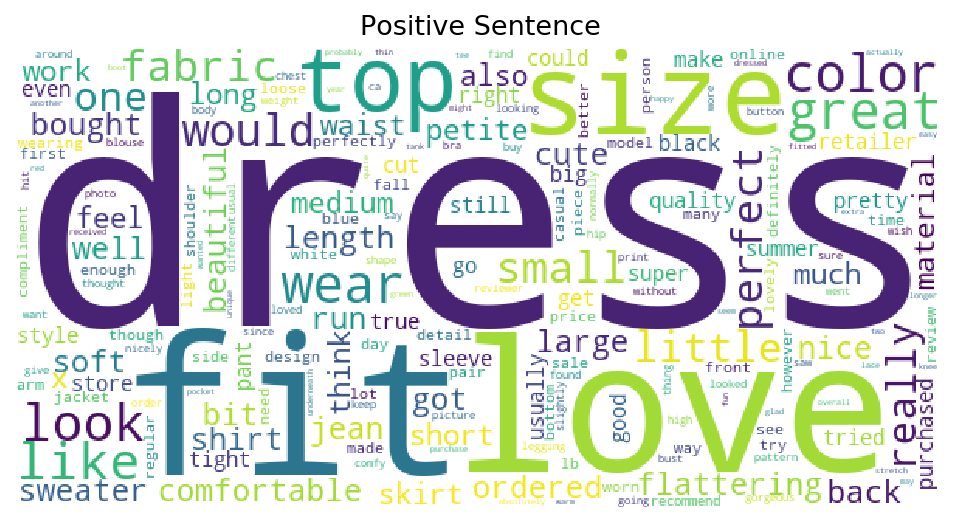

In [39]:
wc.generate(positive_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), dpi =150)
plt.imshow(wc)
plt.axis("off")
plt.title("Positive Sentence", fontsize=13)
plt.show();

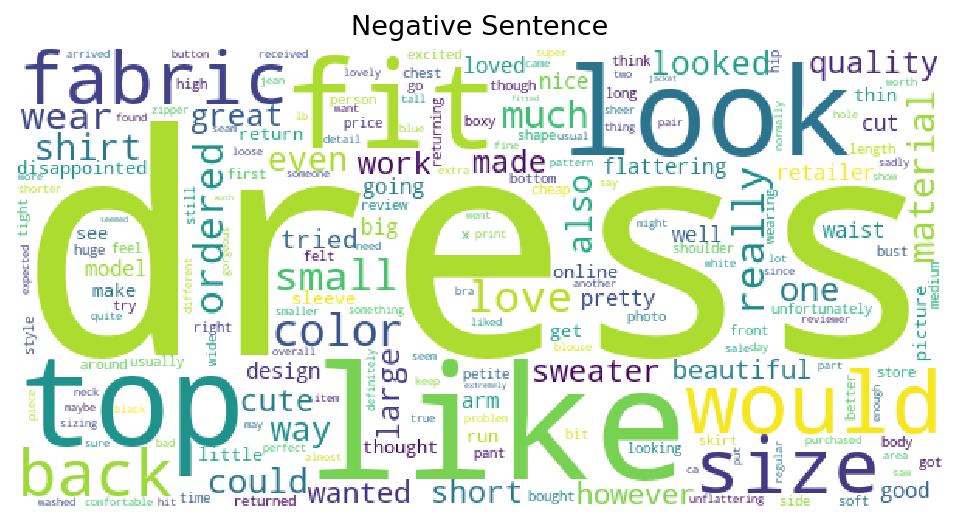

In [40]:
wc.generate(negative_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), dpi =150)
plt.imshow(wc)
plt.axis("off")
plt.title("Negative Sentence", fontsize=13)
plt.show();

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [43]:
df2['Clean_Text'] = df2['Text'].apply(cleaning)
df2[['Label', 'Clean_Text']]

/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Label,Clean_Text
0,1,absolutely wonderful silky sexy comfortable
1,1,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,1,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
...,...,...
23481,1,happy snag dress great price easy slip flattering cut color combo
23482,1,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok
23483,0,fit well top see never would worked glad able try store order online different fabric would great
23484,1,bought dress wedding summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking


In [44]:
df2.drop('Text', axis=1, inplace=True)

/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df2.head()

,Label,Clean_Text
0,1,absolutely wonderful silky sexy comfortable
1,1,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,1,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt


In [47]:
X = df2['Clean_Text']
y = df2['Label']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [49]:
X_train

16998                                                                                                                                                                                                loved minute saw email got blue grey medium little roomy nice sweater love cropped length really well made
18766                                                                                                                         purchased dress green print material lovely extra fold neckline made dress look frumpy top billowly bottom made look like bag waist size fit make think run large returning dress
2670     pretty disappointed bought yellow pair wore today first time super cute comfortable love got two small stain day activity not even crazy untreatable stain unfortunately stain not budge yet color short washed completely ruined one washing cold hoping fluke plan order second pair sell going back
7547                                       ordered little big smallest size medium proba

In the next step we create a numerical feature vector for each document:

### Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, ngram_range=(1,2))
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [55]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
vectorizer.get_feature_names_out()[:20]

array(['ab', 'abdomen', 'ability', 'able', 'able bend', 'able button',
       'able buy', 'able dress', 'able easily', 'able find', 'able fit',
       'able fix', 'able get', 'able go', 'able keep', 'able order',
       'able pull', 'able purchase', 'able see', 'able size'],
      dtype=object)

### TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, ngram_range=(1,2))
X_train_tfidf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tfidf = tf_idf_vectorizer.transform(X_test)

In [61]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
tf_idf_vectorizer.get_feature_names_out()[:20]

array(['ab', 'abdomen', 'ability', 'able', 'able bend', 'able button',
       'able buy', 'able dress', 'able easily', 'able find', 'able fit',
       'able fix', 'able get', 'able go', 'able keep', 'able order',
       'able pull', 'able purchase', 'able see', 'able size'],
      dtype=object)

In [63]:
pd.DataFrame(X_test_tfidf.toarray(), columns=tf_idf_vectorizer.get_feature_names())

/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abdomen,ability,able,able bend,able button,able buy,able dress,able easily,able find,able fit,able fix,able get,able go,able keep,able order,able pull,able purchase,able see,able size,able snag,able stretch,able try,able tuck,able use,...,zipper button,zipper detail,zipper difficult,zipper extremely,zipper front,zipper go,zipper got,zipper little,zipper not,zipper one,zipper pocket,zipper pull,zipper seems,zipper side,zipper split,zipper stick,zipper style,zipper top,zipper tried,zipper would,zipper zip,zippered,zipping,zone,zoom
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4525,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4526,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4527,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [65]:
from sklearn.metrics import accuracy_score, f1_score

In [67]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7,7))
    plot_confusion_matrix(model, X_test, y_test, ax=ax, values_format='.0f')

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
log_count = LogisticRegression(max_iter=1500, class_weight='balanced', solver='sag')
log_count.fit(X_train_count, y_train)

LogisticRegression(class_weight='balanced', max_iter=1500, solver='sag')

LOG MODEL W/ COUNTVECTORIZER
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.89      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


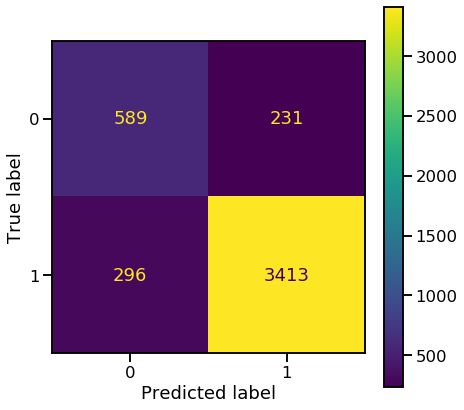

In [69]:
print('LOG MODEL W/ COUNTVECTORIZER')
eval(log_count, X_test_count)

In [70]:
y_pred_log_count = log_count.predict(X_test_count)
log_count_accuracy = accuracy_score(y_test, y_pred_log_count)
log_count_f1 = f1_score(y_test, y_pred_log_count)

In [71]:
log_tfidf = LogisticRegression(max_iter=1000, class_weight='balanced')
log_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL W/ TF_IDF
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       820
           1       0.96      0.86      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.84      0.79      4529
weighted avg       0.89      0.85      0.86      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


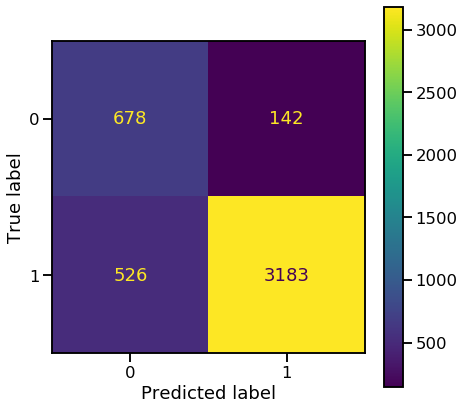

In [73]:
print('LOG MODEL W/ TF_IDF')
eval(log_tfidf, X_test_count)

In [74]:
y_pred_log_tfidf = log_tfidf.predict(X_test_tfidf)
log_tfidf_accuracy = accuracy_score(y_test, y_pred_log_tfidf)
log_tfidf_f1 = f1_score(y_test, y_pred_log_tfidf)

### Naive Bayes 



In [75]:
from sklearn.naive_bayes import MultinomialNB
nb_count = MultinomialNB(alpha=0.1)
nb_count.fit(X_train_count, y_train)

MultinomialNB(alpha=0.1)

NB MODEL W/ COUNTVECTORIZER
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.89      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


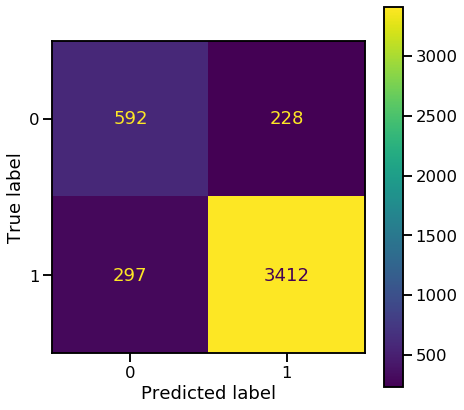

In [76]:
print('NB MODEL W/ COUNTVECTORIZER')
eval(nb_count, X_test_count)

In [77]:
y_pred_nb_count = nb_count.predict(X_test_count)
nb_count_accuracy = accuracy_score(y_test, y_pred_nb_count)
nb_count_f1 = f1_score(y_test, y_pred_nb_count)

In [78]:
nb_tfidf = MultinomialNB(alpha=0.2)
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.2)

NB MODEL 1/ TF_IDF
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.79      0.81      4529
weighted avg       0.89      0.89      0.89      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


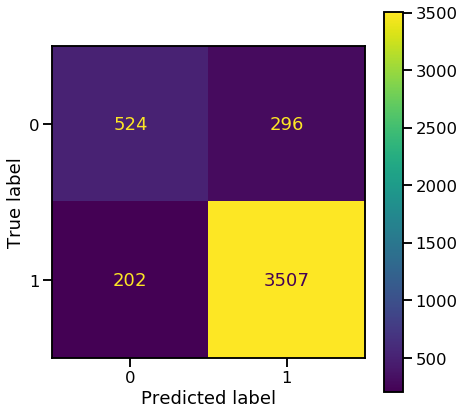

In [79]:
print('NB MODEL 1/ TF_IDF')
eval(nb_tfidf, X_test_count)

In [80]:
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_tfidf_accuracy = accuracy_score(y_test, y_pred_nb_tfidf)
nb_tfidf_f1 = f1_score(y_test, y_pred_nb_tfidf)

### Support Vector Machine (SVM)

In [81]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C=3)
svc_count.fit(X_train_count, y_train)

/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=3)

SVC MODEL W/ COUNTVECTORIZER
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       820
           1       0.92      0.93      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.79      0.77      0.78      4529
weighted avg       0.87      0.87      0.87      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


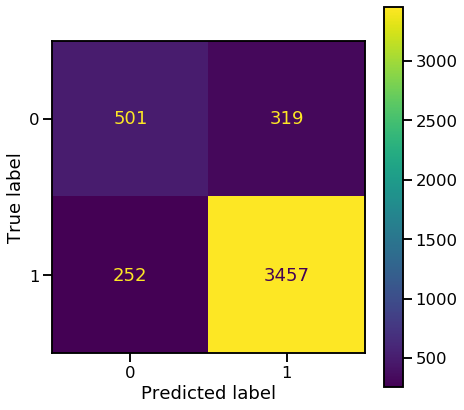

In [82]:
print('SVC MODEL W/ COUNTVECTORIZER')
eval(svc_count, X_test_count)

In [83]:
y_pred_svc_count = svc_count.predict(X_test_count)
svc_count_accuracy = accuracy_score(y_test, y_pred_svc_count)
svc_count_f1 = f1_score(y_test, y_pred_svc_count)

In [84]:
svc_tfidf = LinearSVC(C=2, class_weight='balanced')
svc_tfidf.fit(X_train_tfidf, y_train)

LinearSVC(C=2, class_weight='balanced')

SCV MODEL W/ TF_IDF
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       820
           1       0.94      0.91      0.92      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


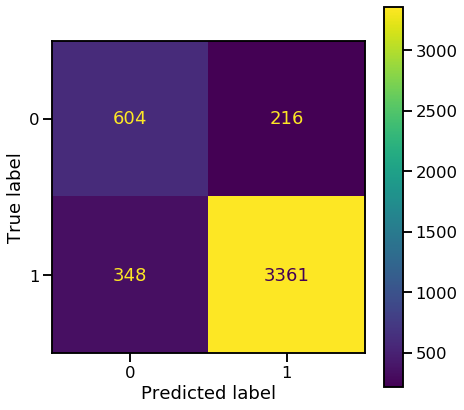

In [86]:
print('SCV MODEL W/ TF_IDF')
eval(svc_tfidf, X_test_count)

In [87]:
y_pred_svc_tfidf = svc_tfidf.predict(X_test_tfidf)
svc_tfidf_accuracy = accuracy_score(y_test, y_pred_svc_tfidf)
svc_tfidf_f1 = f1_score(y_test, y_pred_svc_tfidf)

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier(n_estimators=120, n_jobs=-1, class_weight='balanced')
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=120, n_jobs=-1)

RF MODEL W/ COUNTVECTORIZER
              precision    recall  f1-score   support

           0       0.82      0.31      0.45       820
           1       0.87      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.84      0.65      0.68      4529
weighted avg       0.86      0.86      0.84      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


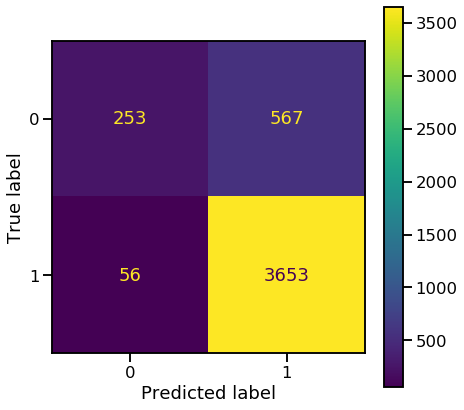

In [89]:
print('RF MODEL W/ COUNTVECTORIZER')
eval(rf_count, X_test_count)

In [90]:
y_pred_rf_count = rf_count.predict(X_test_count)
rf_count_accuracy = accuracy_score(y_test, y_pred_rf_count)
rf_count_f1 = f1_score(y_test, y_pred_rf_count)

In [91]:
rf_tfidf = RandomForestClassifier(200, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

RF MODEL W/ TF_IDF
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       820
           1       0.91      0.92      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.77      0.77      4529
weighted avg       0.86      0.87      0.87      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


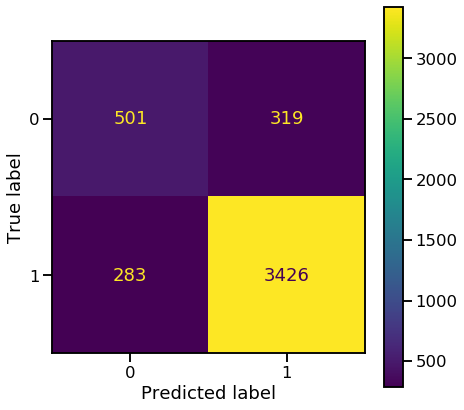

In [92]:
print('RF MODEL W/ TF_IDF')
eval(rf_tfidf, X_test_count)

In [93]:
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)
rf_tfidf_accuracy = accuracy_score(y_test, y_pred_rf_tfidf)
rf_tfidf_f1 = f1_score(y_test, y_pred_rf_tfidf)


### Ada  Boosting

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada_count = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=0.5)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=150, random_state=42)

ADA MODEL W/ COUNTVECTORIZER
              precision    recall  f1-score   support

           0       0.75      0.43      0.54       820
           1       0.88      0.97      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.82      0.70      0.73      4529
weighted avg       0.86      0.87      0.86      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


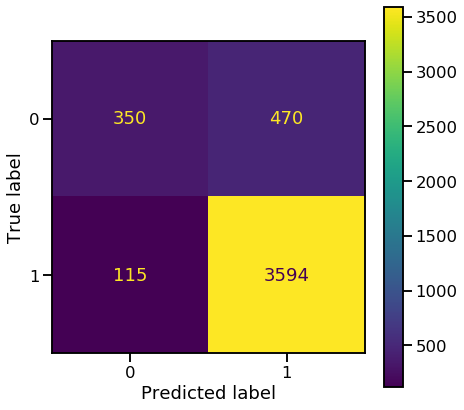

In [96]:
print('ADA MODEL W/ COUNTVECTORIZER')
eval(ada_count, X_test_count)

In [97]:
y_pred_ada_count = ada_count.predict(X_test_count)
ada_count_accuracy = accuracy_score(y_test, y_pred_ada_count)
ada_count_f1 = f1_score(y_test, y_pred_ada_count)

In [98]:
ada_tfidf = AdaBoostClassifier(n_estimators=200, random_state=42, learning_rate=0.5)
ada_tfidf.fit(X_train_tfidf, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

ADA MODEL W/ TF_IDF
              precision    recall  f1-score   support

           0       0.74      0.49      0.59       820
           1       0.90      0.96      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.73      0.76      4529
weighted avg       0.87      0.88      0.87      4529



/Users/gozdesim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


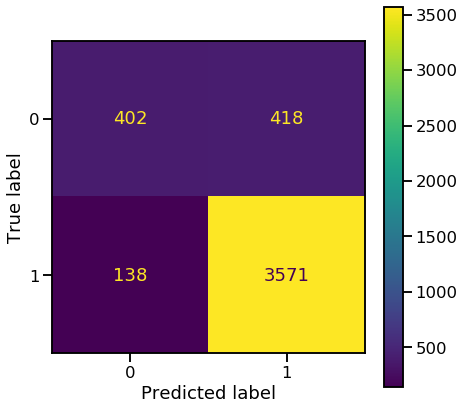

In [99]:
print('ADA MODEL W/ TF_IDF')
eval(ada_tfidf, X_test_count)

In [101]:
y_pred_ada_tfidf = ada_tfidf.predict(X_test_tfidf)
ada_tfidf_accuracy = accuracy_score(y_test, y_pred_ada_tfidf)
ada_tfidf_f1 = f1_score(y_test, y_pred_ada_tfidf)

### Compare Models Accuracies and F1 Scores

In [103]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'ADABoost'],
                       'F1_COUNT': [log_count_f1, nb_count_f1, svc_count_f1, rf_count_f1, ada_count_f1],
                       'F1_TF_IDF': [log_tfidf_f1, nb_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],
                       'ACCURACY_COUNT': [log_count_accuracy, nb_count_accuracy, svc_count_accuracy, rf_count_accuracy, ada_count_accuracy],
                        'ACCURACY_TF_IDF': [log_tfidf_accuracy, nb_tfidf_accuracy, svc_tfidf_accuracy, rf_tfidf_accuracy, ada_tfidf_accuracy]})

In [104]:
compare

,Model,F1_COUNT,F1_TF_IDF,ACCURACY_COUNT,ACCURACY_TF_IDF
0,Logistic Regression,0.93,0.92,0.88,0.88
1,Naive Bayes,0.93,0.93,0.88,0.88
2,SVM,0.92,0.93,0.87,0.89
3,Random Forest,0.92,0.92,0.86,0.86
4,ADABoost,0.92,0.93,0.87,0.88


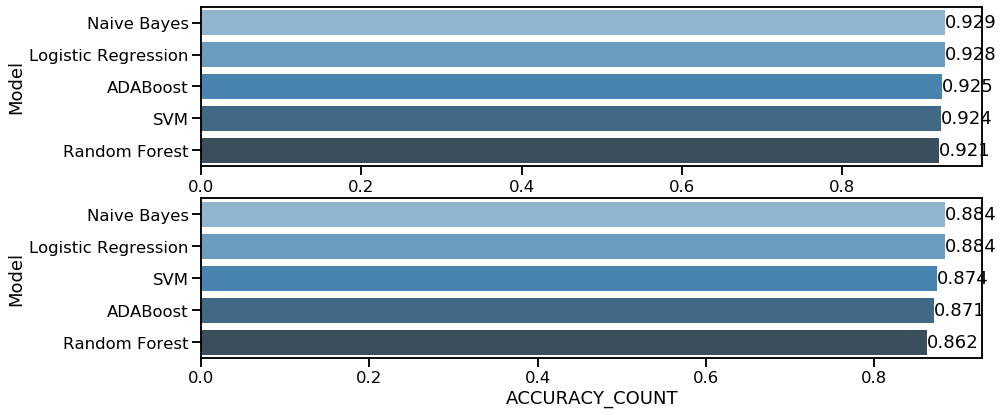

In [108]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'ADABoost'],
                       'F1_COUNT': [log_count_f1, nb_count_f1, svc_count_f1, rf_count_f1, ada_count_f1],
                       'F1_TF_IDF': [log_tfidf_f1, nb_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],
                       'ACCURACY_COUNT': [log_count_accuracy, nb_count_accuracy, svc_count_accuracy, rf_count_accuracy, ada_count_accuracy],
                        'ACCURACY_TF_IDF': [log_tfidf_accuracy, nb_tfidf_accuracy, svc_tfidf_accuracy, rf_tfidf_accuracy, ada_tfidf_accuracy]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2, 
                '{:1.3f}'.format(width),
                ha = 'left',
                va = 'center')
        
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by='F1_COUNT', ascending=False)
ax=sns.barplot(x='F1_COUNT', y='Model', data=compare, palette='Blues_d')
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by='ACCURACY_COUNT', ascending=False)
ax=sns.barplot(x='ACCURACY_COUNT', y='Model', data=compare, palette='Blues_d')
labels(ax);

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___